## Statistical Modeling, Part 1: Linear Regression

In this exercise, you'll get a chance to practice building and analyzing linear models using the data from the UN exercise.

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

You'll be working with the combined gdp and life expectancy data.

In [2]:
gdp_le = pd.read_csv('../data/gdp_le.csv').dropna()

In [3]:
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
1,Afghanistan,2018,2033.779002,Asia,64.486
2,Afghanistan,2017,2058.383832,Asia,64.130
3,Afghanistan,2016,2057.062164,Asia,63.763
4,Afghanistan,2015,2068.265904,Asia,63.377
...,...,...,...,...,...
5109,Zimbabwe,1994,3263.934978,Africa,52.044
5110,Zimbabwe,1993,3033.504852,Africa,53.653
5111,Zimbabwe,1992,3054.889178,Africa,55.243
5112,Zimbabwe,1991,3426.598094,Africa,56.749


### Part 1: Analyzing 2019

For this part, we'll look at our dataset just for the year 2019.

In [4]:
gdp_le_2019 = gdp_le[gdp_le['Year'] == 2019].copy()

Fit a linear regression model on the 2019 data with target variable life expenctancy and predictor variable GDP per capita.

In [5]:
lm = smf.ols('Life_Expectancy ~ GDP_Per_Capita', data = gdp_le_2019).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     166.8
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           8.13e-27
Time:                        19:54:46   Log-Likelihood:                -513.64
No. Observations:                 167   AIC:                             1031.
Df Residuals:                     165   BIC:                             1038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         67.9940      0.566    120.197      0.000      66.877      69.111
GDP_Per_Capita     0.0002   1.79e-05     12.915      0.000       0.000       0.000
==============================================================================
Omnibus:                       20.455   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.319
Skew:                          -0.923   Prob(JB):                     5.24e-06
Kurtosis:                       3.295   Cond. No.                     4.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Question:** How can we interpret the meaning of the coefficient for GDP_Per_Capita?

- For every $1 increase in GDP per capita, the average life expectancy increases by 0.0002 years

It might make it easier to interpret if we changed the units on GDP_Per_Capita since a one unit change in GDP per capita does not have a very large impact at all on GDP_Per_Capita.

Fit a new model, but this time use thousands of dollars of GDP_Per_Capita as your predictor variable.

**Hint:** Two ways that you can accomplish this are by creating a new column in your DataFrame or by making use of `I()` in your formula.

In [6]:
lm = smf.ols('Life_Expectancy ~ I(GDP_Per_Capita/1000)', data = gdp_le_2019).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     166.8
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           8.13e-27
Time:                        19:54:46   Log-Likelihood:                -513.64
No. Observations:                 167   AIC:                             1031.
Df Residuals:                     165   BIC:                             1038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   67.9940      0.566    120.197      0.000      66.877      69.111
I(GDP_Per_Capita / 1000)     0.2307      0.018     12.915      0.000       0.195       0.266
==============================================================================
Omnibus:                       20.455   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.319
Skew:                          -0.923   Prob(JB):                     5.24e-06
Kurtosis:                       3.295   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Questions:** How do we interpret the meaning of the coefficients for the new model?

- For every $1000 increase in GDP per capita, the average life expectancy increases by 0.23 years

Now, let's plot the fitted values against the original data.

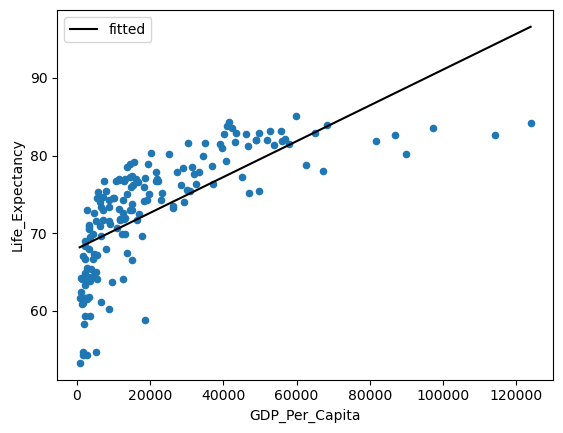

In [7]:
ax = gdp_le_2019.plot(x = 'GDP_Per_Capita', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2019['GDP_Per_Capita'].min(),
        stop = gdp_le_2019['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'GDP_Per_Capita', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

**Question:** What potential problems do you see with this fit?

You saw from the guided exploration portion of the project that using the logarithm of the GDP resulted in a larger correlation value. 

Fit a new model using the log of GDP Per Capita as a predictor variable.

**Hint:** You can do this by using `'Life_Expectancy ~ np.log(GDP_Per_Capita)'` as your formula.

In [8]:
lm = smf.ols('Life_Expectancy ~ np.log(GDP_Per_Capita)', data = gdp_le_2019).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     424.2
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           1.82e-47
Time:                        19:54:46   Log-Likelihood:                -465.69
No. Observations:                 167   AIC:                             935.4
Df Residuals:                     165   BIC:                             941.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 21.7086      2.512      8.643      0.000      16.749      26.668
np.log(GDP_Per_Capita)     5.4472      0.264     20.596      0.000       4.925       5.969
==============================================================================
Omnibus:                       33.242   Durbin-Watson:                   2.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.032
Skew:                          -1.028   Prob(JB):                     3.05e-12
Kurtosis:                       4.843   Cond. No.                         78.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Difficult Question:** How do we interpret the meaning of the coefficient for log(GDP_Per_Capita)?

- For every 1% increase in GDP per capita, the life expectancy will increase on average by 0.054472

$ y = a* log(x) + b $

derivate and get: $ dy = a * \frac{dx}{x}$

$ dy = \frac{a}{100} * \frac{100*dx}{x} $

$ dy = \frac{a}{100} * percent.change$ 

Let's look at the plot of our fitted vales agains the data.

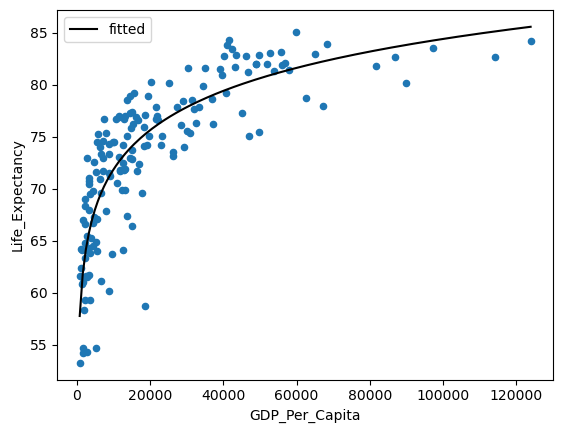

In [9]:
ax = gdp_le_2019.plot(x = 'GDP_Per_Capita', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2019['GDP_Per_Capita'].min(),
        stop = gdp_le_2019['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'GDP_Per_Capita', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

We can also look on the log scale.

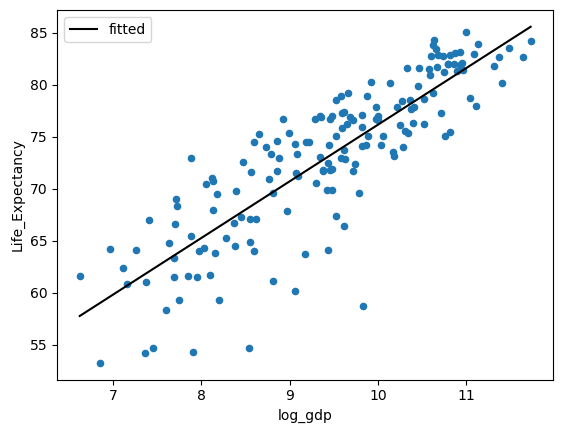

In [10]:
gdp_le_2019['log_gdp'] = np.log(gdp_le_2019['GDP_Per_Capita'])

ax = gdp_le_2019.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2019['GDP_Per_Capita'].min(),
        stop = gdp_le_2019['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'log_gdp', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

## Part 2: Life Expectancy Over Time

Now, let's explore the relationship between health and wealth over time.

First, using all data in gdp_le, fit a model for life expectancy based on number of years since 1990. (Hint: make use of I()) to help with this.

In [22]:
lm = smf.ols('Life_Expectancy ~ I(Year - 1990)', data = gdp_le).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     358.7
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           2.86e-77
Time:                        20:36:02   Log-Likelihood:                -17994.
No. Observations:                4922   AIC:                         3.599e+04
Df Residuals:                    4920   BIC:                         3.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.4573      0.267    241.860      0.000      63.935      64.980
I(Year - 1990)     0.2953      0.016     18.939      0.000       0.265       0.326
==============================================================================
Omnibus:                      443.591   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              574.393
Skew:                          -0.837   Prob(JB):                    1.87e-125
Kurtosis:                       3.004   Cond. No.                         34.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** How can you interpret the meaning of both of the coefficients of this model?

We can compare the fit model to the data.

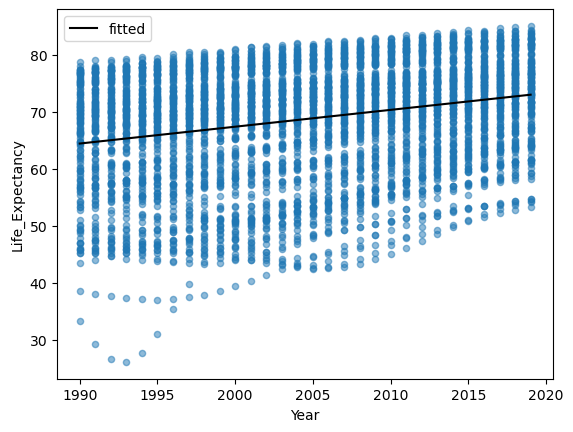

In [23]:
ax = gdp_le.plot(kind = 'scatter', x = 'Year', y = 'Life_Expectancy', alpha = 0.5)

fit_df = pd.DataFrame({
    'Year': np.linspace(
        start = gdp_le['Year'].min(),
        stop = gdp_le['Year'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'Year', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

Perhaps we could do better if we include continent in our model. Fit a model which includes a term for Continent. (Don't include any interactions yet).

In [24]:
lm_continent = smf.ols('Life_Expectancy ~ I(Year - 1990) + Continent', data = gdp_le).fit()
lm_continent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1332.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:37:38   Log-Likelihood:                -15791.
No. Observations:                4922   AIC:                         3.160e+04
Df Residuals:                    4915   BIC:                         3.164e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     53.0815      0.221    239.892      0.000      52.648      53.515
Continent[T.Asia]             13.2758      0.244     54.437      0.000      12.798      13.754
Continent[T.Europe]           18.6185      0.238     78.315      0.000      18.152      19.085
Continent[T.North America]    15.9228      0.287     55.560      0.000      15.361      16.485
Continent[T.Oceania]          12.4150      0.398     31.195      0.000      11.635      13.195
Continent[T.South America]    14.5785      0.369     39.507      0.000      13.855      15.302
I(Year - 1990)                 0.2883      0.010     28.901      0.000       0.269       0.308
==============================================================================
Omnibus:                       68.182   Durbin-Watson:                   0.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.460
Skew:                           0.154   Prob(JB):                     1.53e-22
Kurtosis:                       3.629   Cond. No.                         98.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Questions:**

1. Is including a term for continent statistically significant?
2. How do you interpret the meaning of the model coefficients?
3. What does the model say about European vs. Asian vs. African countries with respect to life expectancy in 1990 and the increase over time of life expectancy?

In [43]:
# Fill in the code to check if the term for continent is significant
sm.stats.anova_lm(lm, lm_continent) #.style.format('{:,.20f}')

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,4920.0,431569.848950,0.0,NaN,NaN,NaN
1,4915.0,176355.860946,5.0,255213.988004,1422.551816,0.0


Adjust the `continent` variable below to see the fitted vs. actual values by continent. What do you notice?

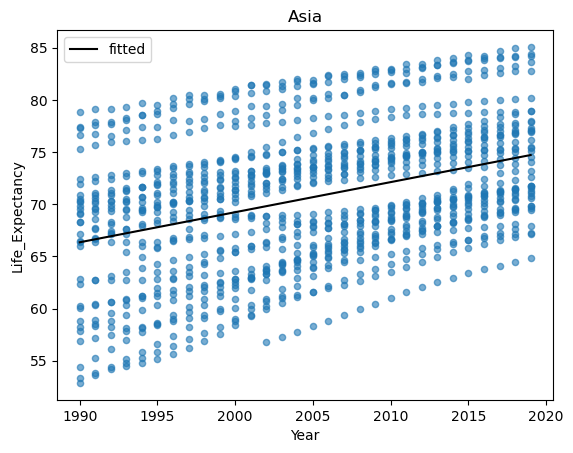

In [15]:
continent = 'Asia'

sub_df = gdp_le[gdp_le['Continent'] == continent]

ax = sub_df.plot(x = 'Year', 
                 y = 'Life_Expectancy',
                 kind = 'scatter',
                 title = continent,
                 alpha = 0.6)

fit_df = pd.DataFrame({
    'Year': np.linspace(start = sub_df['Year'].min(),
                                  stop = sub_df['Year'].max()
                                 ),
    'Continent': continent
})
fit_df['fitted'] = lm_continent.predict(fit_df)
fit_df.plot(x = 'Year', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

Now, add an interaction term between Continent and Year to your model.

In [21]:
lm_continent_int = smf.ols('Life_Expectancy ~ I(Year - 2019) + Continent + I(Year - 2019):Continent', data = gdp_le).fit()
# alternatively, the * will do individual variables AND their interaction:
#lm_continent_int = smf.ols('Life_Expectancy ~ I(Year - 2019) * Continent', data = gdp_le).fit()
lm_continent_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     743.8
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:21:28   Log-Likelihood:                -15753.
No. Observations:                4922   AIC:                         3.153e+04
Df Residuals:                    4910   BIC:                         3.161e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    63.3103      0.318    199.215      0.000      62.687      63.933
Continent[T.Asia]                            11.4587      0.468     24.510      0.000      10.542      12.375
Continent[T.Europe]                          15.6172      0.456     34.255      0.000      14.723      16.511
Continent[T.North America]                   12.8567      0.554     23.195      0.000      11.770      13.943
Continent[T.Oceania]                          9.4755      0.774     12.243      0.000       7.958      10.993
Continent[T.South America]                   12.4749      0.713     17.486      0.000      11.076      13.874
I(Year - 2019)                                0.4191      0.019     22.019      0.000       0.382       0.456
I(Year - 2019):Continent[T.Asia]             -0.1271      0.028     -4.499      0.000      -0.182      -0.072
I(Year - 2019):Continent[T.Europe]           -0.2119      0.028     -7.670      0.000      -0.266      -0.158
I(Year - 2019):Continent[T.North America]    -0.2135      0.033     -6.468      0.000      -0.278      -0.149
I(Year - 2019):Continent[T.Oceania]          -0.2044      0.046     -4.455      0.000      -0.294      -0.114
I(Year - 2019):Continent[T.South America]    -0.1470      0.042     -3.471      0.001      -0.230      -0.064
==============================================================================
Omnibus:                       89.492   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.415
Skew:                           0.210   Prob(JB):                     1.30e-28
Kurtosis:                       3.671   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Questions:** 
1. Are the interaction terms statistically significant?
2. What does the model say about European vs. Asian vs. African countries with respect to life expectancy in 1990 and the increase over time of life expectancy?

In [17]:
# Fill in the code to check if the interaction terms are significant
sm.stats.anova_lm(lm_continent, lm_continent_int)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,4915.0,176355.860946,0.0,NaN,NaN,NaN
1,4910.0,173655.421080,5.0,2700.439866,15.270655,6.367544e-15


You can uses the code in the next cell to explore the output from the new model.

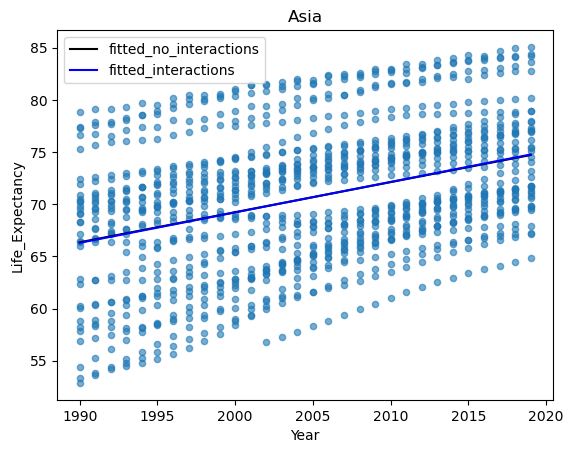

In [18]:
continent = 'Asia'

sub_df = gdp_le[gdp_le['Continent'] == continent]

ax = sub_df.plot(x = 'Year', 
                 y = 'Life_Expectancy',
                 kind = 'scatter',
                 title = continent,
                 alpha = 0.6)

fit_df = pd.DataFrame({
    'Year': np.linspace(start = sub_df['Year'].min(),
                        stop = sub_df['Year'].max()
                       ),
    'Continent': continent
})
fit_df['fitted_no_interactions'] = lm_continent.predict(fit_df)
fit_df['fitted_interactions'] = lm_continent_int.predict(fit_df)
fit_df.plot(x = 'Year', y = 'fitted_no_interactions', ax = ax, color = 'black', label = 'fitted_no_interactions')
fit_df.plot(x = 'Year', y = 'fitted_interactions', ax = ax, color = 'blue', label = 'fitted_interactions');

## Part 3: The Effect of Wealth on Health

Now, let's try and uncover the effect of wealth on health, after accounting for the effect of Continent and year.

Fit a model that builds off of your previous model but includes a term for the log of gdp per capita.

In [44]:
lm_gdp = smf.ols('Life_Expectancy ~ I(Year - 2019) + Continent + I(Year - 2019):Continent + np.log(GDP_Per_Capita)', data = gdp_le).fit()
lm_gdp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1707.
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:34:15   Log-Likelihood:                -14122.
No. Observations:                4922   AIC:                         2.827e+04
Df Residuals:                    4909   BIC:                         2.836e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    26.1300      0.593     44.067      0.000      24.968      27.292
Continent[T.Asia]                             5.8150      0.346     16.816      0.000       5.137       6.493
Continent[T.Europe]                           6.4575      0.354     18.240      0.000       5.763       7.152
Continent[T.North America]                    6.3503      0.409     15.513      0.000       5.548       7.153
Continent[T.Oceania]                          6.7271      0.557     12.074      0.000       5.635       7.819
Continent[T.South America]                    6.5619      0.520     12.629      0.000       5.543       7.581
I(Year - 2019)                                0.3245      0.014     23.622      0.000       0.298       0.351
I(Year - 2019):Continent[T.Asia]             -0.1627      0.020     -8.016      0.000      -0.202      -0.123
I(Year - 2019):Continent[T.Europe]           -0.2124      0.020    -10.709      0.000      -0.251      -0.174
I(Year - 2019):Continent[T.North America]    -0.2041      0.024     -8.612      0.000      -0.251      -0.158
I(Year - 2019):Continent[T.Oceania]          -0.1610      0.033     -4.887      0.000      -0.226      -0.096
I(Year - 2019):Continent[T.South America]    -0.1507      0.030     -4.957      0.000      -0.210      -0.091
np.log(GDP_Per_Capita)                        4.4641      0.066     67.934      0.000       4.335       4.593
==============================================================================
Omnibus:                      282.819   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              803.831
Skew:                          -0.288   Prob(JB):                    2.82e-175
Kurtosis:                       4.894   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** How do we interpret the coefficient of log(gdp)?

In [45]:
gdp_le['log_gdp'] = np.log(gdp_le['GDP_Per_Capita'])

The resulting model looks at gdp vs. life expectancy by continent. You can explore how the fitted values compare to the actual values by adjusting the values for year and continent below.

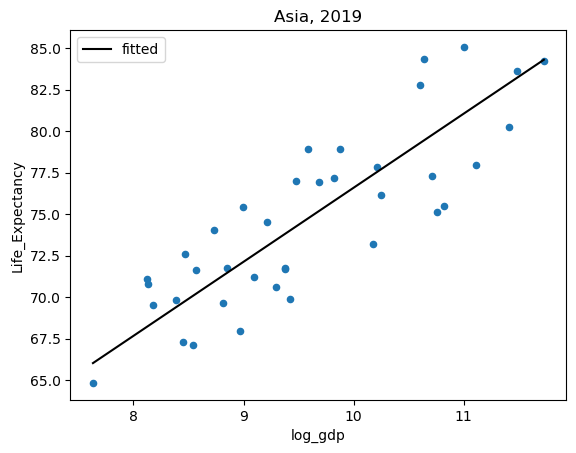

In [46]:
year = 2019
continent = 'Asia'

sub_df = gdp_le[(gdp_le['Year'] == year) & (gdp_le['Continent'] == continent)]

ax = sub_df.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter', title = f'{continent}, {year}')

fit_df = pd.DataFrame({
    'Year': year,
    'Continent': continent,
    'GDP_Per_Capita': np.linspace(start = sub_df['GDP_Per_Capita'].min(),
                                  stop = sub_df['GDP_Per_Capita'].max()
                                 )
})
fit_df['fitted'] = lm_gdp.predict(fit_df)
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df.plot(x = 'log_gdp', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

Perhaps we could estimate different effects of gdp per continent. Add an interaction term between continent and gdp.

In [47]:
lm_gdp_cont = smf.ols('Life_Expectancy ~ I(Year - 2019) + Continent + I(Year - 2019):Continent + np.log(GDP_Per_Capita) + np.log(GDP_Per_Capita):Continent', data = gdp_le).fit()
lm_gdp_cont.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     1217.
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:44:08   Log-Likelihood:                -14101.
No. Observations:                4922   AIC:                         2.824e+04
Df Residuals:                    4904   BIC:                         2.835e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                            22.6007      1.072     21.085      0.000      20.499      24.702
Continent[T.Asia]                                    12.9138      1.487      8.685      0.000       9.999      15.829
Continent[T.Europe]                                  10.0548      2.052      4.899      0.000       6.031      14.078
Continent[T.North America]                           11.9355      2.298      5.193      0.000       7.430      16.441
Continent[T.Oceania]                                  6.6616      2.504      2.661      0.008       1.753      11.570
Continent[T.South America]                          -15.1168      6.471     -2.336      0.020     -27.803      -2.431
I(Year - 2019)                                        0.3155      0.014     22.745      0.000       0.288       0.343
I(Year - 2019):Continent[T.Asia]                     -0.1428      0.021     -6.931      0.000      -0.183      -0.102
I(Year - 2019):Continent[T.Europe]                   -0.2033      0.020    -10.038      0.000      -0.243      -0.164
I(Year - 2019):Continent[T.North America]            -0.1911      0.024     -7.938      0.000      -0.238      -0.144
I(Year - 2019):Continent[T.Oceania]                  -0.1566      0.033     -4.741      0.000      -0.221      -0.092
I(Year - 2019):Continent[T.South America]            -0.1992      0.034     -5.914      0.000      -0.265      -0.133
np.log(GDP_Per_Capita)                                4.8878      0.126     38.863      0.000       4.641       5.134
np.log(GDP_Per_Capita):Continent[T.Asia]             -0.7958      0.163     -4.870      0.000      -1.116      -0.475
np.log(GDP_Per_Capita):Continent[T.Europe]           -0.4303      0.209     -2.058      0.040      -0.840      -0.020
np.log(GDP_Per_Capita):Continent[T.North America]    -0.6338      0.241     -2.635      0.008      -1.105      -0.162
np.log(GDP_Per_Capita):Continent[T.Oceania]          -0.0218      0.277     -0.079      0.937      -0.565       0.521
np.log(GDP_Per_Capita):Continent[T.South America]     2.1876      0.671      3.259      0.001       0.872       3.504
==============================================================================
Omnibus:                      331.643   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              903.860
Skew:                          -0.369   Prob(JB):                    5.36e-197
Kurtosis:                       4.965   Cond. No.                     2.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is lar

**Questions:** 
1. Are the new interaction terms statistically significant?
2. What does the model say about European vs. Asian vs. African countries with respect to the effect of gdp on life expectancy?

In [48]:
# Fill in the code to check if the interaction term is significant
sm.stats.anova_lm(lm_gdp, lm_gdp_cont)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,4909.0,89507.666732,0.0,NaN,NaN,NaN
1,4904.0,88721.441122,5.0,786.22561,8.691586,3.242754e-08


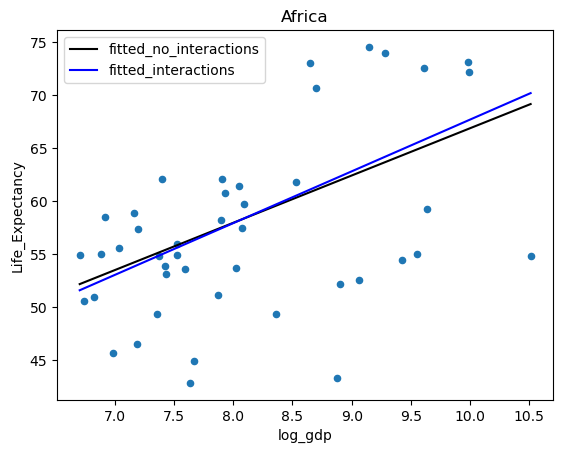

In [49]:
year = 2007
continent = 'Africa'

sub_df = gdp_le[(gdp_le['Year'] == year) & (gdp_le['Continent'] == continent)]

ax = sub_df.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter', title = continent)

fit_df = pd.DataFrame({
    'Year': year,
    'Continent': continent,
    'GDP_Per_Capita': np.linspace(start = sub_df['GDP_Per_Capita'].min(),
                                  stop = sub_df['GDP_Per_Capita'].max()
                                 )
})
fit_df['fitted_no_interactions'] = lm_gdp.predict(fit_df)
fit_df['fitted_interactions'] = lm_gdp_cont.predict(fit_df)
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df.plot(x = 'log_gdp', y = 'fitted_no_interactions', ax = ax, color = 'black', label = 'fitted_no_interactions');
fit_df.plot(x = 'log_gdp', y = 'fitted_interactions', ax = ax, color = 'blue', label = 'fitted_interactions');

Finally, add an interaction term between log(gdp) and year.

In [50]:
lm_gdp_cont_year = smf.ols('Life_Expectancy ~ I(Year - 1990) + Continent + Continent:(I(Year - 1990) + np.log(GDP_Per_Capita)) + np.log(GDP_Per_Capita) + np.log(GDP_Per_Capita):I(Year - 1990)', data = gdp_le).fit()
lm_gdp_cont_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1157.
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:45:03   Log-Likelihood:                -14087.
No. Observations:                4922   AIC:                         2.821e+04
Df Residuals:                    4903   BIC:                         2.834e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             8.6679      1.359      6.376      0.000       6.003      11.333
Continent[T.Asia]                                    16.7747      1.374     12.210      0.000      14.081      19.468
Continent[T.Europe]                                  15.5436      1.924      8.077      0.000      11.771      19.316
Continent[T.North America]                           16.6162      2.166      7.673      0.000      12.371      20.862
Continent[T.Oceania]                                 10.6750      2.395      4.457      0.000       5.979      15.371
Continent[T.South America]                           -9.7850      6.029     -1.623      0.105     -21.605       2.035
I(Year - 1990)                                        0.6366      0.064      9.994      0.000       0.512       0.761
Continent[T.Asia]:I(Year - 1990)                     -0.0945      0.023     -4.184      0.000      -0.139      -0.050
Continent[T.Europe]:I(Year - 1990)                   -0.1178      0.026     -4.510      0.000      -0.169      -0.067
Continent[T.North America]:I(Year - 1990)            -0.1326      0.027     -4.995      0.000      -0.185      -0.081
Continent[T.Oceania]:I(Year - 1990)                  -0.1261      0.033     -3.765      0.000      -0.192      -0.060
Continent[T.South America]:I(Year - 1990)            -0.1454      0.035     -4.131      0.000      -0.214      -0.076
np.log(GDP_Per_Capita)                                5.4930      0.172     32.000      0.000       5.156       5.830
Continent[T.Asia]:np.log(GDP_Per_Capita)             -0.8423      0.163     -5.160      0.000      -1.162      -0.522
Continent[T.Europe]:np.log(GDP_Per_Capita)           -0.5182      0.209     -2.476      0.013      -0.928      -0.108
Continent[T.North America]:np.log(GDP_Per_Capita)    -0.6368      0.240     -2.654      0.008      -1.107      -0.166
Continent[T.Oceania]:np.log(GDP_Per_Capita)          -0.0174      0.276     -0.063      0.950      -0.559       0.524
Continent[T.South America]:np.log(GDP_Per_Capita)     2.1486      0.670      3.209      0.001       0.836       3.461
np.log(GDP_Per_Capita):I(Year - 1990)                -0.0401      0.008     -5.165      0.000      -0.055      -0.025
==============================================================================
Omnibus:                      316.970   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              834.296
Skew:                          -0.362   Prob(JB):                    6.84e-182
Kurtosis:                       4.883   Cond. No.                     1.62e+04
==============================================================================

Notes:
[1] S

**Question:** How do we interpret the new interaction term?

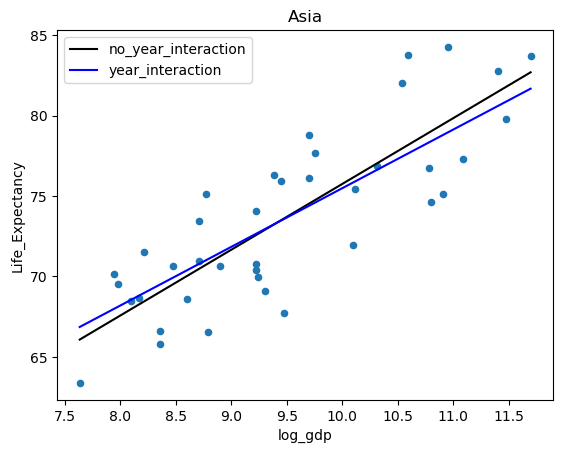

In [51]:
year = 2015
continent = 'Asia'

sub_df = gdp_le[(gdp_le['Year'] == year) & (gdp_le['Continent'] == continent)]

ax = sub_df.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter', title = continent)

fit_df = pd.DataFrame({
    'Year': year,
    'Continent': continent,
    'GDP_Per_Capita': np.linspace(start = sub_df['GDP_Per_Capita'].min(),
                                  stop = sub_df['GDP_Per_Capita'].max()
                                 )
})
fit_df['year_interaction'] = lm_gdp_cont_year.predict(fit_df)
fit_df['no_year_interaction'] = lm_gdp_cont.predict(fit_df)
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df.plot(x = 'log_gdp', y = 'no_year_interaction', ax = ax, color = 'black', label = 'no_year_interaction');
fit_df.plot(x = 'log_gdp', y = 'year_interaction', ax = ax, color = 'blue', label = 'year_interaction');